In [1]:
import pandas as pd
import numpy as np

def normalize_feature(df):
    return df.apply(lambda coloumn: (coloumn - coloumn.mean()) / coloumn.std())

df = normalize_feature(pd.read_csv('data1.csv',
                                  names = ['square', 'bedrooms', 'price']))

ones = pd.DataFrame({'ones': np.ones(len(df))}) # ones是 n行 1列的数据框，表示 x0 恒为 1
df = pd.concat([ones, df], axis = 1) #根据列合并数据
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


### 数据处理：获取 X 和 y

In [2]:
X_data = np.array(df[df.columns[0: 3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df), 1)

print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data)) 

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


### 创建线性回归模型（数据流图）

In [3]:
import tensorflow as tf

alpha = 0.01 # 学习率 alpha
epoch = 500  # 训练全量数据集的轮数

with tf.name_scope('input'):
    # 输入 X，形状为[47, 3]
    X = tf.placeholder(tf.float32, X_data.shape, name = 'X')
    # 输出 y，形状为[47, 1]
    y = tf.placeholder(tf.float32, y_data.shape, name = 'y')

with tf.name_scope('hypothesis'):
    # 权重变量 w，形状[3, 1]
    W = tf.get_variable('weights', (X_data.shape[1], 1), initializer = tf.constant_initializer())

    # 假设函数 h(x) = w0 * x0 + w1 * x1 + w2 * x2，其中 x0 恒为1
    # 推理值 y_pred 形状[47, 1]
    y_pred = tf.matmul(X, W, name = 'y_pred')

with tf.name_scope('loss'):
    # 损失函数采用最小二乘法， y_pred - y 是形如[47, 1]的向量
    # tf.matmul(a, b, transpose_a = True) 表示：矩阵 a 的转置乘矩阵 b，即 [1, 47] * [47, 1]
    # 损失函数操作 loss
    loss_op = 1 / (2 * len(X_data))*tf.matmul((y_pred - y), (y_pred - y),transpose_a = True)
    
with tf.name_scope('train'):
    # 随机梯度下降优化器 opt
    opt = tf.train.GradientDescentOptimizer(learning_rate = alpha)
    # 单轮训练操作 train_op
    train_op = opt.minimize(loss_op)

### 创建会话（运行环境）

In [5]:
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    
    # 创建 FileWriter 实例
    writer = tf.summary.FileWriter('./summary/linear-regression-1/', sess.graph)
    # 记录所有损失值
    loss_data = []
    # 开始训练模型
    # 因为训练集较小，所以采用批梯度下降优化算法，每次都使用全量数据训练
    for e in range(1, epoch+1):
        _, loss, w = sess.run([train_op, loss_op, W], feed_dict = {X: X_data, y: y_data})
        # 记录每一轮损失值的变化情况
        loss_data.append(float(loss))
        if e % 100 == 0:
            log_str = 'Epoch %d \t Loss = %.4g \t Model: y= %.4gx1 + %.4gx2 + %.4g'
            print(log_str % (e, loss, w[1], w[2], w[0]))

writer.close()

Epoch 100 	 Loss = 0.1835 	 Model: y= 0.4909x1 + 0.1621x2 + -6.147e-10
Epoch 200 	 Loss = 0.1483 	 Model: y= 0.6678x1 + 0.1255x2 + 2.119e-10
Epoch 300 	 Loss = 0.1379 	 Model: y= 0.7522x1 + 0.07118x2 + 5.087e-10
Epoch 400 	 Loss = 0.1337 	 Model: y= 0.8004x1 + 0.02938x2 + 1.694e-09
Epoch 500 	 Loss = 0.132 	 Model: y= 0.8304x1 + 0.0008239x2 + 4.138e-09


### 可视化损失值

In [11]:
loss_data

[0.4893616735935211,
 0.4805491268634796,
 0.4719858765602112,
 0.463664710521698,
 0.45557814836502075,
 0.4477195143699646,
 0.4400818943977356,
 0.4326588213443756,
 0.4254439175128937,
 0.41843095421791077,
 0.4116140604019165,
 0.4049871861934662,
 0.3985452353954315,
 0.3922821879386902,
 0.3861931562423706,
 0.3802728056907654,
 0.3745161294937134,
 0.36891821026802063,
 0.36347493529319763,
 0.3581809997558594,
 0.35303252935409546,
 0.34802505373954773,
 0.3431544005870819,
 0.33841654658317566,
 0.3338077664375305,
 0.32932406663894653,
 0.32496190071105957,
 0.3207176625728607,
 0.3165879547595978,
 0.31256935000419617,
 0.308658629655838,
 0.304852694272995,
 0.3011484444141388,
 0.2975428104400635,
 0.2940331697463989,
 0.29061657190322876,
 0.2872902750968933,
 0.28405171632766724,
 0.2808983623981476,
 0.2778277099132538,
 0.2748374342918396,
 0.27192503213882446,
 0.2690884470939636,
 0.2663253843784332,
 0.2636337876319885,
 0.26101154088974,
 0.25845661759376526,
 0.2

In [12]:
len(loss_data)

500

Text(0, 0.5, 'loss')

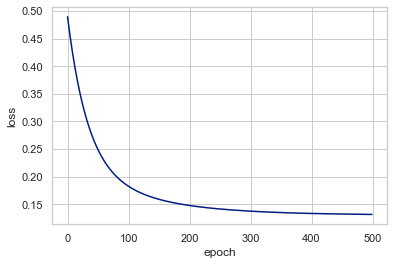

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', style = 'whitegrid', palette = 'dark')

ax = sns.lineplot(x = 'epoch', y = 'loss', data = pd.DataFrame({'loss': loss_data, 
                                                               'epoch': np.arange(epoch)}))
ax.set_xlabel('epoch')
ax.set_ylabel('loss')